In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
loan=pd.read_csv('loan.csv')
app=pd.read_csv('applicant.csv')
df=pd.merge(loan,app,on='applicant_id')
df

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,d68fbba6-edad-11ea-80fe-30b2f9300e3d,1880194,12,FF&E,1736000,3,real estate,0,0,NaN,...,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,d68fbc28-edad-11ea-bc62-4240ac0824fa,1114064,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,...,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,d68fbcaa-edad-11ea-aafc-2de1139e42cd,1758046,12,electronic equipment,804000,4,car or other,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,d68fbd2c-edad-11ea-b49e-2894666f2df6,1824545,45,electronic equipment,1845000,4,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


In [3]:
cat=df.select_dtypes(include='object')

In [4]:
num=df.select_dtypes(include=np.number).drop(columns='high_risk_applicant')

In [5]:
cat.shape,num.shape

((1000, 15), (1000, 11))

In [6]:
cat.isna().sum()

loan_application_id                                           0
Purpose                                                      12
Property                                                    154
Other_EMI_plans                                             814
Loan_history                                                  0
Gender                                                        0
Marital_status                                                0
Housing                                                       0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

In [7]:
cat['loan_application_id'].value_counts()

d68e51da-edad-11ea-85e6-3b82b84a5ca2    1
d68f25b0-edad-11ea-a4f3-1969f6821fbc    1
d68f611a-edad-11ea-a358-0a70d45938c0    1
d68e4d0c-edad-11ea-ae79-3a47e5e3c803    1
d68e73ea-edad-11ea-a50d-02cb8061727a    1
                                       ..
d68e370e-edad-11ea-9d54-37c1c4c21c6c    1
d68e6d6e-edad-11ea-aa40-35ffc9e81a4d    1
d68fb67e-edad-11ea-8d5a-29f542a3a609    1
d68f3bf4-edad-11ea-a40c-2bd6c595582c    1
d68fb99e-edad-11ea-b9a9-15d10df9edbb    1
Name: loan_application_id, Length: 1000, dtype: int64

* It is a useless column. We should drop it

In [8]:
cat=cat.drop(columns='loan_application_id')

In [9]:
cat['Purpose'].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [10]:
cat['Purpose'].fillna('electronic equipment',inplace=True)

In [11]:
cat['Purpose'].value_counts()

electronic equipment    292
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

In [12]:
cat['Property'].value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

In [13]:
cat['Property'].fillna('car or other',inplace=True)

In [14]:
cat['Property'].value_counts()

car or other                                         486
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

* Since most of the column Other_Emi_plans is empty, we should drop it

In [15]:
cat=cat.drop(columns='Other_EMI_plans')

In [16]:
cat['Has_been_employed_for_at_least'].value_counts()

1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

In [17]:
cat['Has_been_employed_for_at_least'].fillna('1 year',inplace=True)

In [18]:
cat['Has_been_employed_for_at_least'].value_counts()

1 year     401
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

In [19]:
cat['Has_been_employed_for_at_most'].isna().sum()/cat.shape[0]

0.253

* We should drop rest of the columns

In [20]:
cat.drop(columns=['Has_been_employed_for_at_most','Telephone','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'],inplace=True)

In [21]:
cat.isna().sum()

Purpose                           0
Property                          0
Loan_history                      0
Gender                            0
Marital_status                    0
Housing                           0
Employment_status                 0
Has_been_employed_for_at_least    0
dtype: int64

In [22]:
num.isna().sum()

applicant_id                                   0
Months_loan_taken_for                          0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Primary_applicant_age_in_years                 0
Number_of_dependents                           0
Years_at_current_residence                     0
Foreign_worker                                 0
dtype: int64

In [23]:
dum=pd.get_dummies(cat,drop_first=True)

In [24]:
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
scaled

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
0,-0.197641,-1.236478,-0.745131,0.918477,-0.206768,-0.234206,1.027079,2.766456,-0.428290,1.046987,0.196014
1,-1.360200,2.248194,0.949817,-0.870183,-0.206768,-0.234206,-0.704926,-1.191404,-0.428290,-0.765977,0.196014
2,-0.358774,-0.738668,-0.416562,-0.870183,-0.206768,-0.234206,-0.704926,1.183312,2.334869,0.140505,0.196014
3,-1.343973,1.750384,1.634247,-0.870183,-0.206768,4.269750,-0.704926,0.831502,2.334869,1.046987,0.196014
4,0.698598,0.256953,0.566664,0.024147,-0.206768,-0.234206,1.027079,1.535122,2.334869,1.046987,0.196014
...,...,...,...,...,...,...,...,...,...,...,...
995,1.598826,-0.738668,-0.544162,0.024147,-0.206768,-0.234206,-0.704926,-0.399832,-0.428290,1.046987,0.196014
996,-1.753131,0.754763,0.207612,0.918477,-0.206768,-0.234206,-0.704926,0.391740,-0.428290,1.046987,0.196014
997,1.064406,-0.738668,-0.874503,0.918477,-0.206768,-0.234206,-0.704926,0.215835,-0.428290,1.046987,0.196014
998,1.355352,1.999289,-0.505528,0.918477,-0.206768,-0.234206,-0.704926,-1.103451,-0.428290,1.046987,0.196014


In [25]:
X=pd.concat([scaled,dum],axis=1)
y=df['high_risk_applicant']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_proba=logreg.predict_proba(X_test)
y_pred_proba=pd.DataFrame(y_pred_proba[:,1:])

In [27]:
a=[]
for i in y_pred_proba[0]:
    if i>0.5:
        a.append(1)
    else:
        a.append(0)
y_pred=a
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       142
           1       0.51      0.31      0.39        58

    accuracy                           0.71       200
   macro avg       0.64      0.60      0.60       200
weighted avg       0.69      0.71      0.69       200



In [28]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0','Actual: 1'])

,Predicted: 0,Predicted: 1
Actual: 0,125,17
Actual: 1,40,18


* We need a better Recall for 1

In [29]:
a=[]
for i in y_pred_proba[0]:
    if i>0.4:
        a.append(1)
    else:
        a.append(0)
y_pred=a
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       142
           1       0.45      0.50      0.48        58

    accuracy                           0.68       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.69      0.68      0.68       200



In [30]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0','Actual: 1'])

,Predicted: 0,Predicted: 1
Actual: 0,107,35
Actual: 1,29,29


In [31]:
a=[]
for i in y_pred_proba[0]:
    if i>0.3:
        a.append(1)
    else:
        a.append(0)
y_pred=a
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       142
           1       0.39      0.62      0.48        58

    accuracy                           0.61       200
   macro avg       0.59      0.61      0.58       200
weighted avg       0.68      0.61      0.63       200



In [32]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0','Actual: 1'])

,Predicted: 0,Predicted: 1
Actual: 0,86,56
Actual: 1,22,36


In [33]:
a=[]
for i in y_pred_proba[0]:
    if i>0.2:
        a.append(1)
    else:
        a.append(0)
y_pred=a
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56       142
           1       0.36      0.79      0.49        58

    accuracy                           0.53       200
   macro avg       0.60      0.61      0.53       200
weighted avg       0.70      0.53      0.54       200



In [34]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0','Actual: 1'])

,Predicted: 0,Predicted: 1
Actual: 0,60,82
Actual: 1,12,46


In [35]:
a=[]
for i in y_pred_proba[0]:
    if i>0.1:
        a.append(1)
    else:
        a.append(0)
y_pred=a
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.19      0.31       142
           1       0.31      0.88      0.46        58

    accuracy                           0.39       200
   macro avg       0.55      0.53      0.38       200
weighted avg       0.65      0.39      0.35       200



In [36]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted: 0','Predicted: 1'],index=['Actual: 0','Actual: 1'])

,Predicted: 0,Predicted: 1
Actual: 0,27,115
Actual: 1,7,51


* Since the Recall of 1 is more important. We can improve it by decreasing the cut-off score. But accuracy goes down

0.6576007770762506


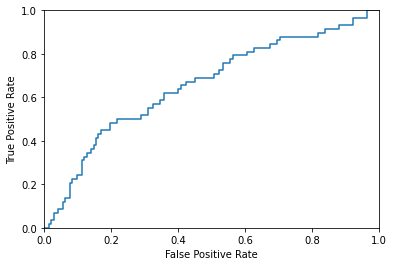

In [37]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(roc_auc_score(y_test,y_pred_proba))
plt.show()